In [41]:
# Import the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Read in the car_plate.jpg file from the data folder.
img = cv2.imread('data/car_plate.jpg')
# Change Color Space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [43]:
# Load the haarcascade_russian_plate_number.xml file.
plate_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

In [44]:
# Function that is effectively blurs the detected plate
def blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,5)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [45]:
result = blur_plate(img)

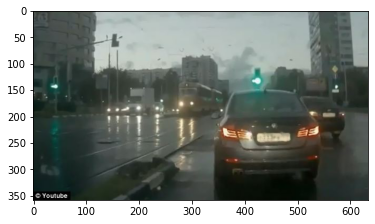

In [46]:
plt.imshow(result)